<a href="https://colab.research.google.com/github/CaptaiN785/ML-Notebooks/blob/main/Water-quality/water_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## Dataset link : https://www.kaggle.com/datasets/adityakadiwal/water-potability/download

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.shape

(3276, 10)

Handeling NA values

In [6]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
## Filling the na values using mean values

mean_ph = df['ph'].mean()
df['ph'].fillna(mean_ph, axis = 0, inplace = True)


sulphate_mean = df['Sulfate'].mean()
df['Sulfate'].fillna(sulphate_mean, axis = 0, inplace = True)

thm_mean = df['Trihalomethanes'].mean()
df['Trihalomethanes'].fillna(thm_mean, axis = 0, inplace = True)


In [10]:
df.isna().any()

ph                 False
Hardness           False
Solids             False
Chloramines        False
Sulfate            False
Conductivity       False
Organic_carbon     False
Trihalomethanes    False
Turbidity          False
Potability         False
dtype: bool

Dataframe Description

In [11]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


- It seems that there are some outliers in solid, Hardness Trihalomthanes.
Box plotting the data

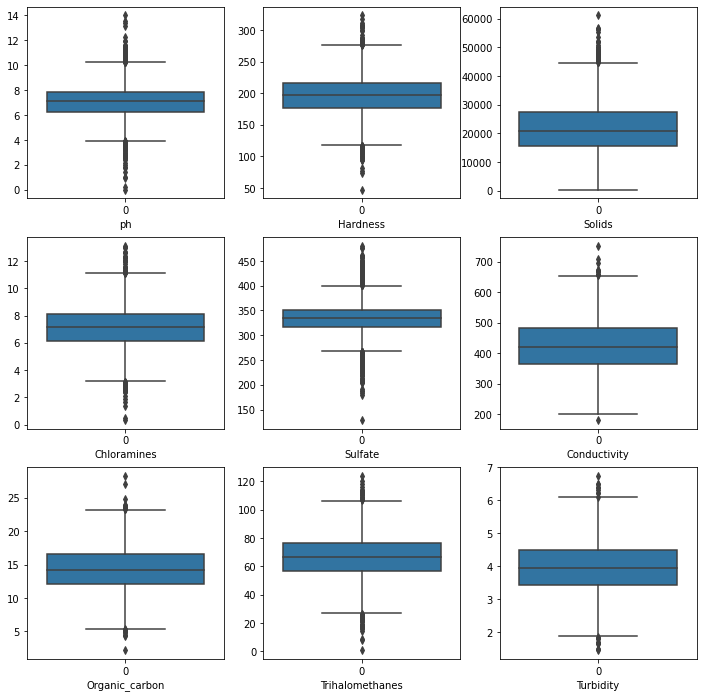

In [27]:
i = 0
plt.figure(figsize = (12, 12))
for column in df.columns[:-1]:
    plt.subplot(3, 3, i+1)
    i += 1
    sns.boxplot(data = df[column])
    plt.xlabel(column)
plt.show()

In [30]:
## Let's try to remove the outliers

def iqr(df, column):
    ## Finding the percentile of 25 and 75
    q1 = np.percentile(df[column], 25)
    q3 = np.percentile(df[column], 75)

    ## Inter quartile range
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    return df[(df[column] > lower_bound) & (df[column] < upper_bound)]

In [32]:
for column in df.columns[:-1]:
    df = iqr(df, column)

In [33]:
df.shape

(2657, 10)

In [34]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0


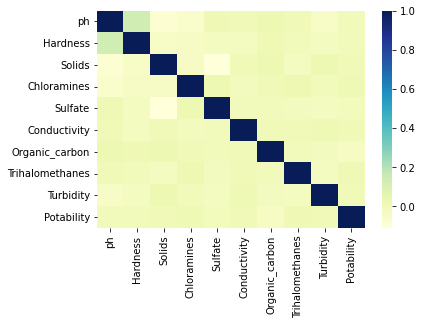

In [37]:
sns.heatmap(df.corr(),cmap='YlGnBu')
## Here data is not much interco-related with each others.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


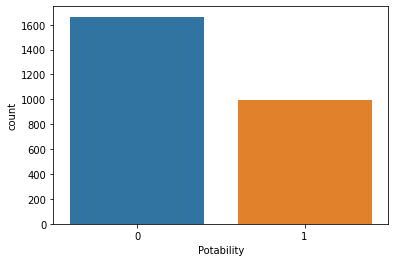

In [39]:
## Checking the bias of data
sns.countplot(df['Potability']);

In [41]:
df['Potability'].value_counts() ## Some kind of bias is present in data

0    1664
1     993
Name: Potability, dtype: int64

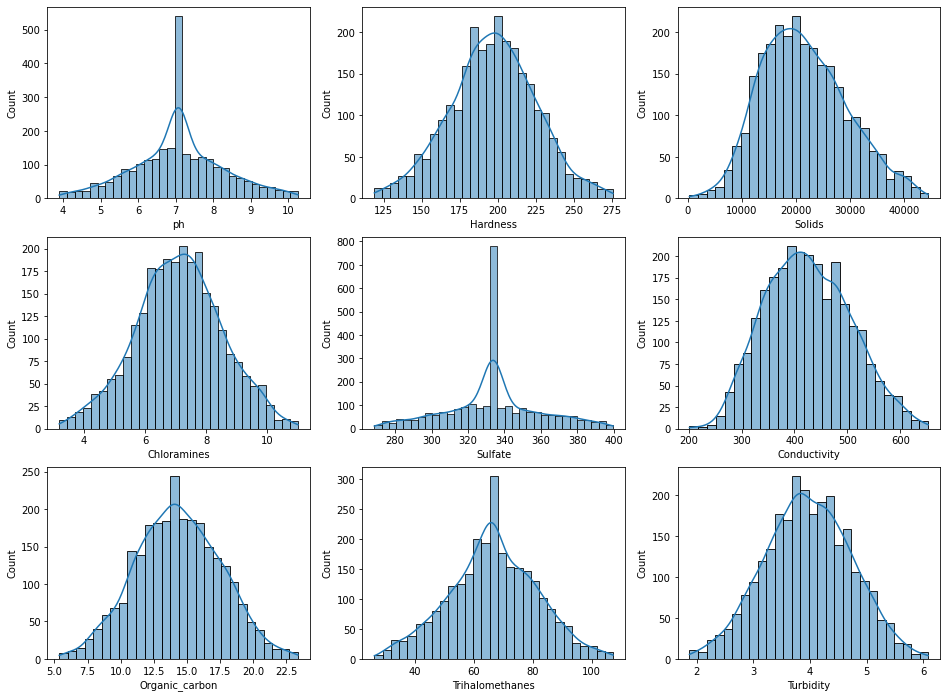

In [45]:
# Checking the data distribution

i = 0
plt.figure(figsize = (16, 12))
for column in df.columns[:-1]:
    plt.subplot(3, 3, i+1)
    i += 1
    sns.histplot(df[column], kde = True)
    plt.xlabel(column)
plt.show()


In [46]:
## Here datas are noramlly distributed except of some like sulphate

In [95]:
## Doing the train and test split
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[: ,-1]
## Data are some imbalanced so resampling data using smote
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [98]:
y.value_counts(), X.shape

(0    1664
 1    1664
 Name: Potability, dtype: int64, (3328, 9))

In [99]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [100]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2662, 9), (2662,), (666, 9), (666,))

In [101]:
## Standardizing the data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [102]:
## Defining the function for accuracy meter
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def metrics(y_test, pred):
    print("Accuracy score is :", accuracy_score(y_test, pred))
    print("Confusion matrix :\n", confusion_matrix(y_test, pred))
    print("Classification report :\n", classification_report(pred, y_test))

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import GridSearchCV

In [104]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [105]:
lr_params = {'C':[0.1, 0.001, 1, 5, 10]}

rf_params = {'ccp_alpha':[0.1, 0.001, 0.0001, 1, 5, 10],
             'max_depth':[10, 20, 30, 40, 50, 70, 10],
             'n_estimators':[50, 60, 80, 90, 100, 120]}

dt_params = {'ccp_alpha':[0.1, 0.001, 0.0001, 1, 5, 10],
             'max_depth':[10, 20, 30, 40, 50, 70, 10]}

svc_params = {'C':[0.1, 0.001, 1, 5, 10],
              'degree':[1, 2, 3, 4, 5],
              'coef0':[0.1, 0, 0.001, 1, 10],
              'kernel':['linear', 'rbf']}

nb_params = {'var_smoothing':[1e-4, 1e-2, 1e-8, 1e-10, 1e-9,1e-12]}

knn_params = {'n_neighbors':[5, 8, 10, 12, 15, 20, 10]}

params = [lr_params, rf_params, dt_params, svc_params, nb_params, knn_params]

models = [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(), SVC(), GaussianNB(), KNN()]
names = ["Logistic Regression", "Random Forest Classifier", "Decision Tree", "SVC", "Naive Bayes", "KNN"]

In [107]:
for name, model, param in zip(names, models, params):
    md = GridSearchCV(model, param_grid=param, cv = 5, verbose = 1)
    md.fit(X_train_scaled, y_train)
    pred = md.predict(X_test_scaled)
    print("\n-------------------------------------\n")
    print(name + " score is \n")
    metrics(y_test, pred)
    print("\n-------------------------------------\n")


Fitting 5 folds for each of 5 candidates, totalling 25 fits

-------------------------------------

Logistic Regression score is 

Accuracy score is : 0.496996996996997
Confusion matrix :
 [[145 190]
 [145 186]]
Classification report :
               precision    recall  f1-score   support

           0       0.43      0.50      0.46       290
           1       0.56      0.49      0.53       376

    accuracy                           0.50       666
   macro avg       0.50      0.50      0.50       666
weighted avg       0.51      0.50      0.50       666


-------------------------------------

Fitting 5 folds for each of 252 candidates, totalling 1260 fits

-------------------------------------

Random Forest Classifier score is 

Accuracy score is : 0.7027027027027027
Confusion matrix :
 [[241  94]
 [104 227]]
Classification report :
               precision    recall  f1-score   support

           0       0.72      0.70      0.71       345
           1       0.69      0.71      0